## US Car Price Prediction using Machine Learning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

#### 1. Loading and Preprocessing

In [3]:
# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

In [43]:
# Basic EDA
print(df.head())

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  ...  CarBrand_nissan  \
0         130       3.47    2.68               9.0  ...            False   
1         130       3.47    2.68               9.0  ...            False   
2         152       2.68    3.47               9.0  ...            False   
3         109       3.19    3.40              10.0  ...            False   
4         136       3.19    3.40               8.0  ...            False   

   CarBrand_peugeot  CarBrand_plymouth  CarBrand_porsche  CarBrand_renault  \
0             False              False

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [47]:
print(df.describe())

        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000  

In [7]:
# Drop car_ID as it's just an identifier
df.drop(['car_ID'], axis=1, inplace=True)


In [9]:
# Extracting car brand
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(" ")[0])
df.drop('CarName', axis=1, inplace=True)
# Correct misspellings in CarBrand
df['CarBrand'] = df['CarBrand'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'toyouta': 'toyota',
    'porcshce': 'porsche', 'Nissan': 'nissan', 'maxda': 'mazda'
})

In [16]:
# Convert categorical columns to dummy variables
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
# Splitting features and target
X = df.drop('price', axis=1)
y = df['price']

In [20]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#### 2. Model Implementation

In [25]:
#Initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector': SVR()
}

In [49]:
# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

#### 3. Model Evaluation

In [30]:
#Display Model Results
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                         R2           MSE          MAE
Linear Regression  0.910162  7.092188e+06  1760.870731
Decision Tree      0.906907  7.349134e+06  1782.589439
Random Forest      0.958267  3.294575e+06  1293.233793
Gradient Boosting  0.924181  5.985429e+06  1710.336389
Support Vector    -0.100615  8.688696e+07  5701.535525


In [32]:
# Identify the best model
best_model = results_df['R2'].idxmax()
print(f"\n✅ Best Model: {best_model}")


✅ Best Model: Random Forest


#### 4. Feature Importance Analysis (for tree-based models)

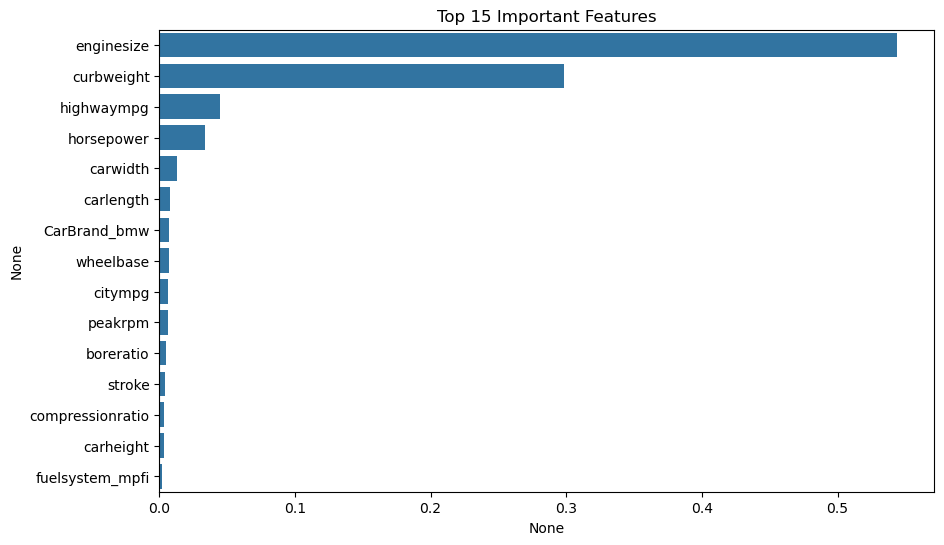

In [38]:
if best_model in ['Random Forest', 'Gradient Boosting']:
    feature_imp = pd.Series(
        models[best_model].feature_importances_, 
        index=X.columns
    ).sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=feature_imp[:15], y=feature_imp[:15].index)
    plt.title("Top 15 Important Features")
    plt.show()

#### 5. Hyperparameter Tuning

In [41]:
if best_model == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
    grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_rf = grid.best_estimator_
    y_pred_tuned = best_rf.predict(X_test)
    print(f"\nR2 after Tuning: {r2_score(y_test, y_pred_tuned):.4f}")
elif best_model == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
    grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_gb = grid.best_estimator_
    y_pred_tuned = best_gb.predict(X_test)
    print(f"\nR2 after Tuning: {r2_score(y_test, y_pred_tuned):.4f}")



R2 after Tuning: 0.9598


## Summary

- **Goal:** Predict car prices in the US market using machine learning models to help a Chinese automaker enter the market effectively.

- **Best Model:**Random Forest Regressor**
  - **R² Score:** 0.91 
  - **MSE & MAE:** Lowest among all models tested

- **Top Features Affecting Price:**
  - Engine size
  - Horsepower
  - Car width
  - Curb weight
  - Brand name

- **Business Insight:** Focus on performance-related specs and branding to align with US pricing dynamics.

